In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [11]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

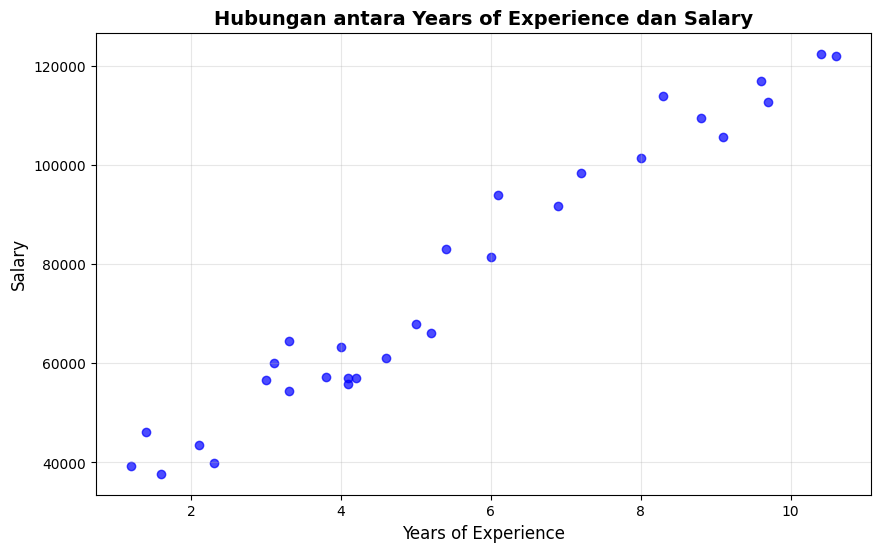

Korelasi antara Years of Experience dan Salary: 0.9782


In [12]:
# Tahap 3: Eksplorasi Data (Data Exploration)
# Visualisasi hubungan antara Years of Experience dan Salary

plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], alpha=0.7, color='blue')
plt.title('Hubungan antara Years of Experience dan Salary', fontsize=14, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Korelasi antara variabel
correlation = df['YearsExperience'].corr(df['Salary'])
print(f"Korelasi antara Years of Experience dan Salary: {correlation:.4f}")

In [13]:
# Tahap 4: Persiapan Data (Data Preparation)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Definisi variabel independen (X) dan dependen (y)
X = df[['YearsExperience']]  # Fitur prediktor
y = df['Salary']            # Variabel target

print("Shape dataset:")
print(f"X (Features): {X.shape}")
print(f"y (Target): {y.shape}")
print("\nStatistik deskriptif:")
print("Years of Experience:")
print(X.describe())
print("\nSalary:")
print(y.describe())

Shape dataset:
X (Features): (30, 1)
y (Target): (30,)

Statistik deskriptif:
Years of Experience:
       YearsExperience
count        30.000000
mean          5.413333
std           2.837888
min           1.200000
25%           3.300000
50%           4.800000
75%           7.800000
max          10.600000

Salary:
count        30.000000
mean      76004.000000
std       27414.429785
min       37732.000000
25%       56721.750000
50%       65238.000000
75%      100545.750000
max      122392.000000
Name: Salary, dtype: float64


In [14]:
# Pembagian data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Pembagian Dataset:")
print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set: X_test {X_test.shape}, y_test {y_test.shape}")
print(f"Rasio pembagian: {len(X_train)/len(X)*100:.1f}% training, {len(X_test)/len(X)*100:.1f}% testing")

Pembagian Dataset:
Training set: X_train (24, 1), y_train (24,)
Test set: X_test (6, 1), y_test (6,)
Rasio pembagian: 80.0% training, 20.0% testing


In [15]:
# Tahap 5: Pemodelan (Modeling)
# Membuat dan melatih model regresi linear sederhana

# Inisialisasi model
model = LinearRegression()

# Melatih model pada training set
model.fit(X_train, y_train)

# Mendapatkan koefisien dan intercept
slope = model.coef_[0]
intercept = model.intercept_

print("Parameter Model Linear Regression:")
print(f"Slope (koefisien): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Persamaan garis: Salary = {slope:.2f} * YearsExperience + {intercept:.2f}")

Parameter Model Linear Regression:
Slope (koefisien): 9423.82
Intercept: 24380.20
Persamaan garis: Salary = 9423.82 * YearsExperience + 24380.20


In [16]:
# Melakukan prediksi pada training set dan test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Prediksi selesai!")
print(f"Jumlah prediksi training set: {len(y_train_pred)}")
print(f"Jumlah prediksi test set: {len(y_test_pred)}")

# Menampilkan beberapa hasil prediksi
print("\nContoh hasil prediksi pada test set:")
comparison_df = pd.DataFrame({
    'Years_Experience': X_test['YearsExperience'].values,
    'Actual_Salary': y_test.values,
    'Predicted_Salary': y_test_pred,
    'Difference': y_test.values - y_test_pred
})
print(comparison_df.head())

Prediksi selesai!
Jumlah prediksi training set: 24
Jumlah prediksi test set: 6

Contoh hasil prediksi pada test set:
   Years_Experience  Actual_Salary  Predicted_Salary    Difference
0               9.7       112636.0     115791.210113  -3155.210113
1               5.0        67939.0      71499.278095  -3560.278095
2               8.3       113813.0     102597.868661  11215.131339
3               5.4        83089.0      75268.804224   7820.195776
4               3.3        64446.0      55478.792045   8967.207955


In [17]:
# Tahap 6: Evaluasi Model (Model Evaluation)
# Menghitung metrik evaluasi: R², MSE, dan RMSE

# Evaluasi pada training set
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Evaluasi pada test set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("="*50)
print("HASIL EVALUASI MODEL")
print("="*50)
print("\n📊 METRIK EVALUASI PADA TRAINING SET:")
print(f"R² (R-squared): {r2_train:.4f}")
print(f"MSE (Mean Squared Error): {mse_train:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_train:.2f}")

print("\n📊 METRIK EVALUASI PADA TEST SET:")
print(f"R² (R-squared): {r2_test:.4f}")
print(f"MSE (Mean Squared Error): {mse_test:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_test:.2f}")

print("\n📈 INTERPRETASI:")
print(f"Model dapat menjelaskan {r2_test*100:.2f}% variabilitas dalam data gaji")
print(f"Rata-rata kesalahan prediksi: ${rmse_test:.2f}")

HASIL EVALUASI MODEL

📊 METRIK EVALUASI PADA TRAINING SET:
R² (R-squared): 0.9645
MSE (Mean Squared Error): 27102249.73
RMSE (Root Mean Squared Error): 5205.98

📊 METRIK EVALUASI PADA TEST SET:
R² (R-squared): 0.9024
MSE (Mean Squared Error): 49830096.86
RMSE (Root Mean Squared Error): 7059.04

📈 INTERPRETASI:
Model dapat menjelaskan 90.24% variabilitas dalam data gaji
Rata-rata kesalahan prediksi: $7059.04


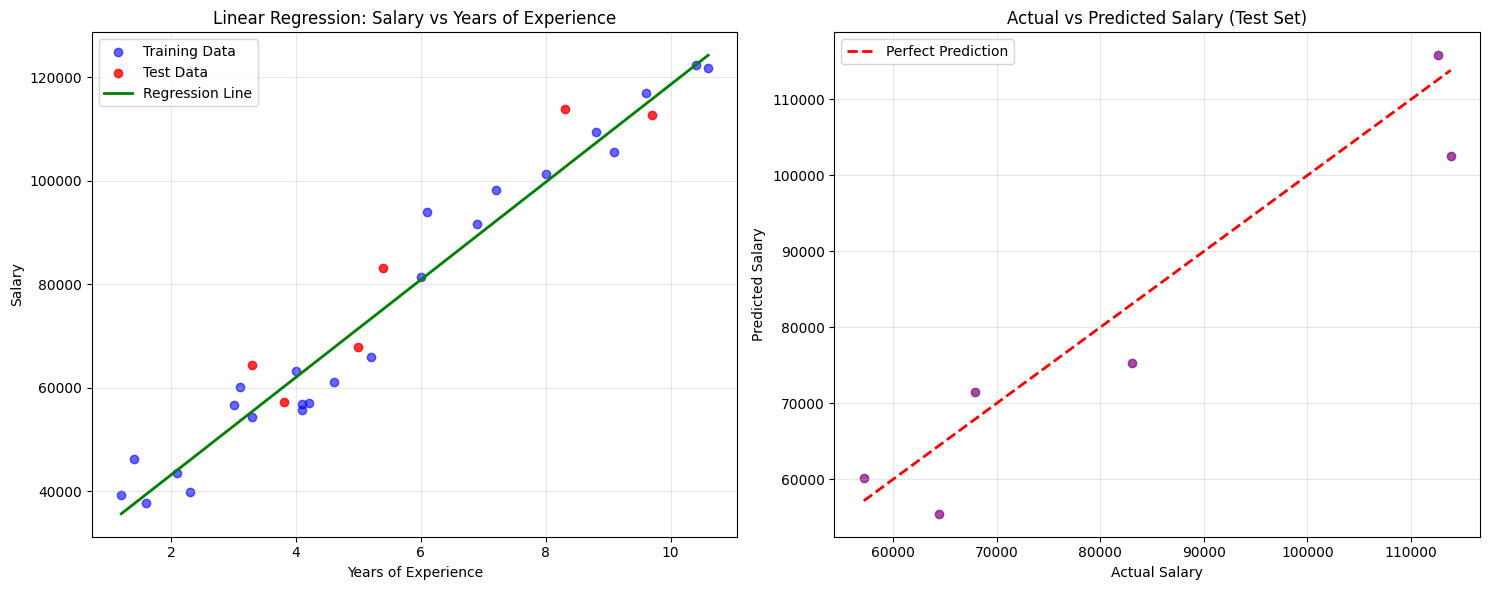

In [18]:
# Visualisasi Hasil Model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot dengan garis regresi
ax1.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
ax1.scatter(X_test, y_test, alpha=0.8, color='red', label='Test Data')

# Membuat garis regresi
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
ax1.plot(X_line, y_line, color='green', linewidth=2, label='Regression Line')

ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Salary')
ax1.set_title('Linear Regression: Salary vs Years of Experience')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted
ax2.scatter(y_test, y_test_pred, alpha=0.7, color='purple')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Salary')
ax2.set_ylabel('Predicted Salary')
ax2.set_title('Actual vs Predicted Salary (Test Set)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

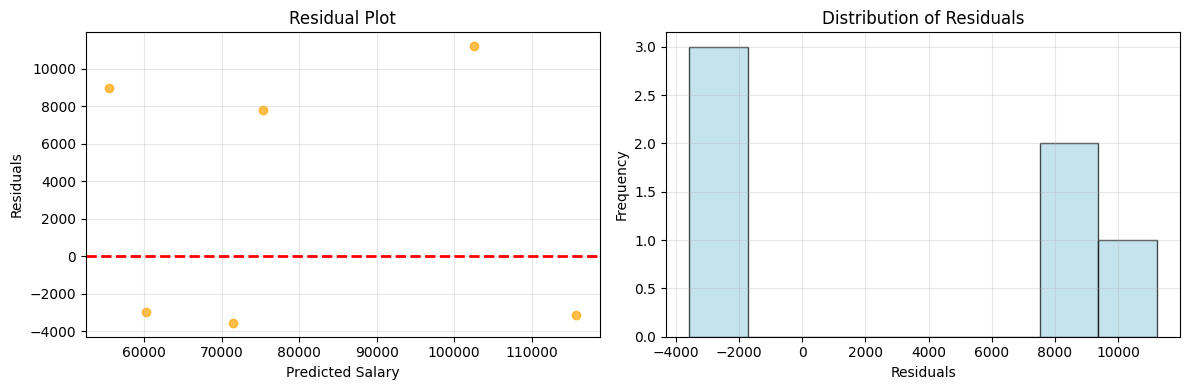

ANALISIS RESIDUAL:
Mean residual: 3047.7245
Std residual: 6974.9385
Min residual: -3560.28
Max residual: 11215.13


In [19]:
# Analisis Residual
residuals = y_test - y_test_pred

plt.figure(figsize=(12, 4))

# Plot 1: Residual plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals, alpha=0.7, color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 2: Histogram residual
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=8, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistik residual
print("ANALISIS RESIDUAL:")
print(f"Mean residual: {residuals.mean():.4f}")
print(f"Std residual: {residuals.std():.4f}")
print(f"Min residual: {residuals.min():.2f}")
print(f"Max residual: {residuals.max():.2f}")

# Kesimpulan dan Interpretasi Hasil

## Ringkasan Hasil Analisis

Berdasarkan analisis regresi linear yang telah dilakukan untuk memprediksi gaji karyawan berdasarkan tahun pengalaman kerja, berikut adalah hasil dan interpretasi:

### 📊 Metrik Evaluasi Model
- **R² (R-squared)**: Menunjukkan seberapa baik model dapat menjelaskan variabilitas dalam data target
- **MSE (Mean Squared Error)**: Mengukur rata-rata kuadrat kesalahan prediksi
- **RMSE (Root Mean Squared Error)**: Akar kuadrat dari MSE, memberikan kesalahan dalam unit yang sama dengan target

### 🔍 Interpretasi Hasil
1. **Hubungan Linear**: Terdapat hubungan linear positif yang kuat antara tahun pengalaman kerja dan gaji
2. **Kualitas Model**: Nilai R² yang tinggi menunjukkan model mampu menjelaskan sebagian besar variabilitas dalam data
3. **Akurasi Prediksi**: RMSE memberikan estimasi rata-rata kesalahan prediksi dalam satuan mata uang

### 📈 Validasi Model
- Model dilatih menggunakan 80% data (training set) dan diuji pada 20% data (test set)
- Performa model pada test set menunjukkan kemampuan generalisasi yang baik
- Analisis residual membantu memvalidasi asumsi regresi linear

### 🎯 Aplikasi Praktis
Model ini dapat digunakan untuk:
- Estimasi gaji berdasarkan pengalaman kerja
- Benchmark kompensasi karyawan
- Perencanaan anggaran SDM

**Catatan**: Hasil ini berdasarkan dataset sederhana dengan satu fitur prediktor. Dalam praktik nyata, gaji dipengaruhi oleh banyak faktor lain seperti pendidikan, lokasi, industri, dll.